# Notes
- dataset description : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- what is a term deposit? https://www.investopedia.com/terms/t/termdeposit.asp

# Imports

In [177]:
import sys
sys.path.append("/Users/tudorlapusan/Documents/workspaces/projects/woodpecker")

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

from woodpecker.sklearn.randomforest.random_forest_structure_classifier import RandomForestStructureClassifier

import pandas as pd
import matplotlib.pyplot as plt

In [176]:
import sys
sys.path.append("/Users/tudorlapusan/Documents/workspaces/projects/woodpecker")

In [158]:
pd.set_option('display.max_columns', 999)

# Data load

In [159]:
dataset = pd.read_csv("../data/bank-additional/bank-additional-full.csv", sep = ";")

# EDA (exploratory data analysis)

In [160]:
dataset.shape

(41188, 21)

In [161]:
dataset.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [162]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


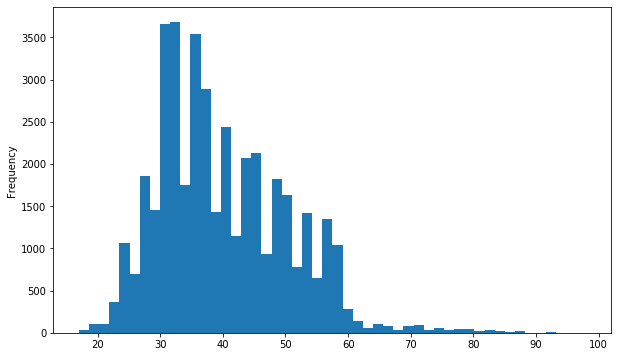

In [163]:
plt.figure(figsize=(10,6))
dataset.age.plot.hist(bins=50)

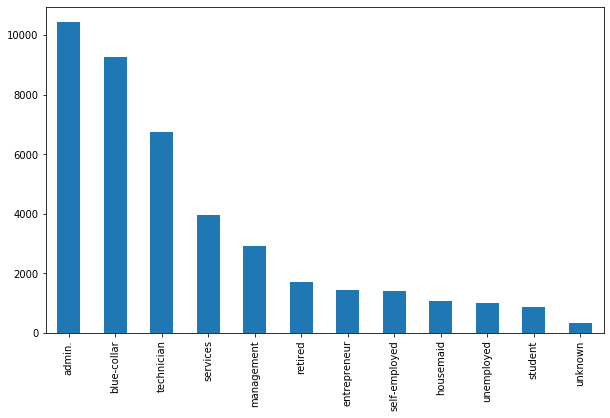

In [164]:
plt.figure(figsize=(10,6))
dataset.job.value_counts().plot.bar()

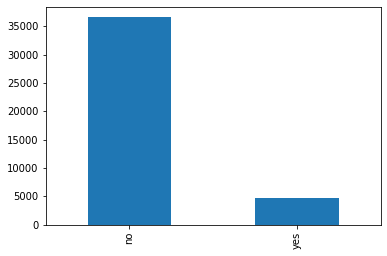

In [165]:
dataset.y.value_counts().plot.bar()

# Feature engineer

In [94]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [200]:
def get_categorical_feature_stats(_dataset):
    _categorical_features = list(_dataset.select_dtypes(include=["object"]).columns)
    _categorical_features_values = {}
    for feature in _categorical_features:
        _categorical_features_values[feature] = _dataset[feature].astype("category").cat.categories
    return _categorical_features, _categorical_features_values

def apply_feature_categories_stats(_dataset, _features, _feature_categories, _drop_feature=False):
    for feature in _features:
        try:
            _dataset[f"{feature}_cat"] = _dataset[feature].astype("category"). \
                cat.set_categories(_feature_categories[feature], ordered=False). \
                cat.codes
            if _drop_feature:
                _dataset.drop(labels=[feature], axis=1, inplace=True)
        except KeyError as ex:
            print(f"There wasn't a category for feature {feature}")



In [201]:
cat_features, cat_features_values = get_categorical_feature_stats(dataset)

In [202]:
cat_features, cat_features_values

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 {'job': Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
         'retired', 'self-employed', 'services', 'student', 'technician',
         'unemployed', 'unknown'],
        dtype='object'),
  'marital': Index(['divorced', 'married', 'single', 'unknown'], dtype='object'),
  'education': Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
         'professional.course', 'university.degree', 'unknown'],
        dtype='object'),
  'default': Index(['no', 'unknown', 'yes'], dtype='object'),
  'housing': Index(['no', 'unknown', 'yes'], dtype='object'),
  'loan': Index(['no', 'unknown', 'yes'], dtype='object'),
  'contact': Index(['cellular', 'telephone'], dtype='object'),
  'month': Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object'),
  'day_of_week': Index(['fri', 'mon

In [203]:
apply_feature_categories_stats(dataset, cat_features, cat_features_values, _drop_feature=True)

# Feature set

In [99]:
target = "y_cat"
features = list(dataset.columns)
features.remove(target)

# Train/validation split

In [100]:
train, validation = train_test_split(dataset, train_size=0.7, shuffle=False)

In [101]:
train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,day_of_week_cat,poutcome_cat,y_cat
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,50,1285,2,999,1,-1.8,93.075,-47.1,1.410,5099.1,1,1,2,1,2,0,0,0,2,0,0
28827,28,48,4,999,1,-1.8,93.075,-47.1,1.410,5099.1,9,2,3,0,2,2,0,0,2,0,0
28828,41,316,2,999,0,-1.8,93.075,-47.1,1.410,5099.1,1,0,0,0,0,2,0,0,2,1,0
28829,38,279,3,999,1,-1.8,93.075,-47.1,1.410,5099.1,9,0,3,0,2,2,0,0,2,0,0


# Model training

## RandomForest v1

In [168]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7, class_weight="balanced")
rf.fit(train[features], train[target])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Model performance

In [169]:
tn, fp, fn, tp = confusion_matrix(validation[target], rf.predict(validation[features])).ravel()
print(f"{tp}, {fp}")
print(f"{fn}, {tn}")
print(tp/(tp+fp))
print(tp/(tp+fn))


2255, 4912
779, 4411
0.31463652853355656
0.7432432432432432


In [170]:
tn, fp, fn, tp = confusion_matrix(validation[target], rf.estimators_[23].predict(validation[features])).ravel()
print(f"{tp}, {fp}")
print(f"{fn}, {tn}")
print(tp/(tp+fp))
print(tp/(tp+fn))

1755, 3926
1279, 5397
0.30892448512585813
0.5784442979564931


In [171]:
roc_auc_score(validation[target], rf.predict_proba(validation[features])[:,1])

0.6607287843144354

### Model interpretation

In [180]:
rfs = RandomForestStructureClassifier(rf, train, features, target)

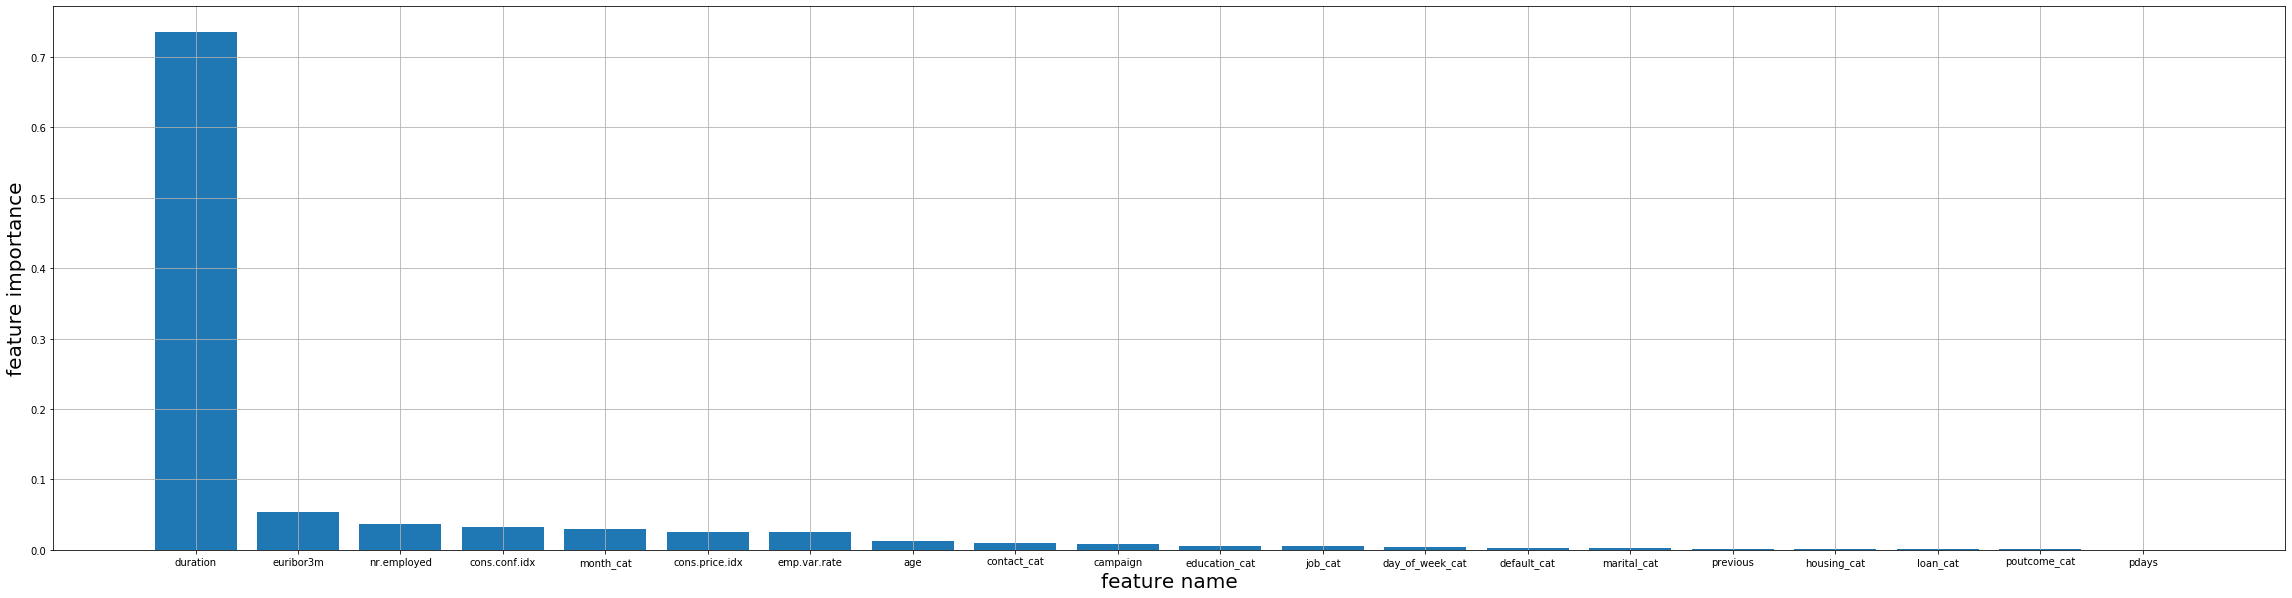

In [182]:
rfs.show_features_importance(figsize=(40,10))

### EDA

In [190]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')



In [191]:
print_full(dataset.duration.value_counts())

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
95      148
80      148
103     147
81      147
67      147
91      147
128     147
77      146
127     146
78      145
100     145
105     145
101     145
157     145
140     145
98      144
112     144
133     143
166     142
110     142
130     142
113     142
121     141
102     141
68      140
159     140
64      139
75      138
79      138
160     137
108     137
144     137
129     136
165     136
154     136
74      136
94      136
155     136
115     135
117     134
131     134
134     133
150     133
143     133
147     131
59      131
168     131
118     131
84      131
69      130
145     130
164     130
99      129
151 

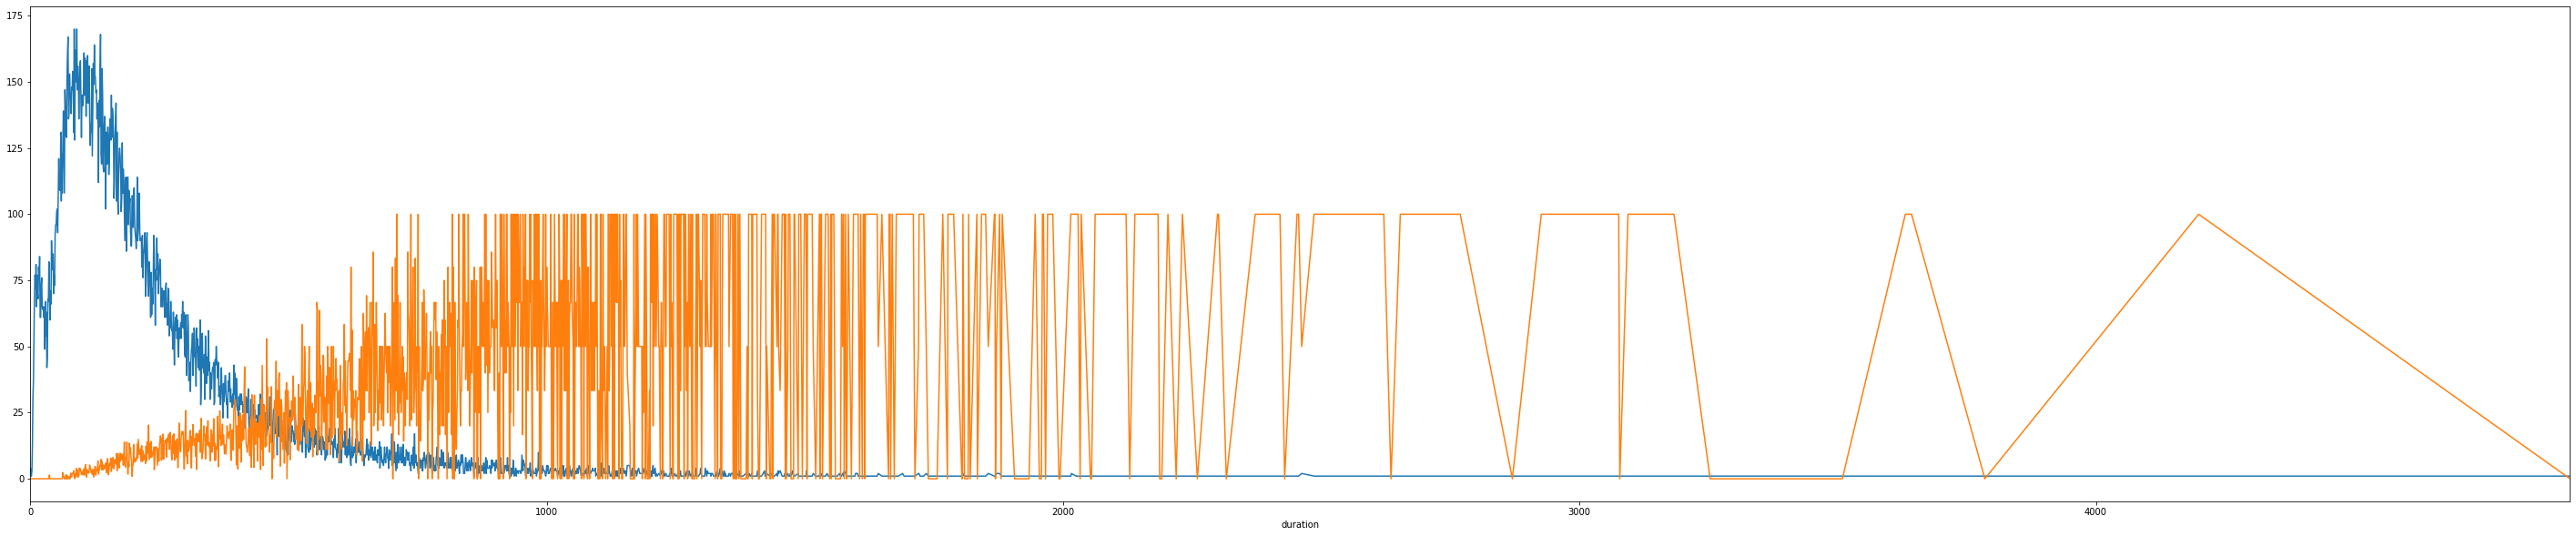

In [215]:
plt.figure(figsize=(50,10))
dataset.duration.value_counts().sort_index().plot.line()
(dataset.groupby(["duration"]).mean()["y_cat"] * 100).plot.line()

## RandomForest v2

In [219]:
features_v2 = features.copy()
features_v2.remove("duration")

In [236]:
rf_v2 = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight="balanced")
rf_v2.fit(train[features_v2], train[target])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Model performance

In [232]:
def print_score(_model, _train, _validation, _features, _target):
    train_precision = precision_score(_train[_target], _model.predict(_train[_features]))
    train_recall = recall_score(_train[_target], _model.predict(_train[_features]))
    val_precision = precision_score(_validation[_target], _model.predict(_validation[_features]))
    val_recall = recall_score(_validation[_target], _model.predict(_validation[_features]))
    print(f"train precision {train_precision}, recall {train_recall}")
    print(f"valid precision {val_precision}, recall {val_recall}")

In [237]:
print_score(rf_v2, train, validation, features_v2, target)

train precision 0.6067467652495379, recall 0.8175591531755916
valid precision 0.37398373983739835, recall 0.015161502966381015


In [235]:
print_score(rf_v2, train, validation, features_v2, target)

train precision 0.17695870320339638, recall 0.5709838107098381
valid precision 0.2204861111111111, recall 0.25115359261700726


In [233]:
print_score(rf_v2, train, validation, features_v2, target)

train precision 0.12275192691978304, recall 0.5354919053549191
valid precision 0.24013046901360927, recall 0.7036914963744232


In [225]:
print

2135, 6756
899, 2567
0.24013046901360927
0.7036914963744232


### Model interpretation

In [226]:
rfs_v2 = RandomForestStructureClassifier(rf_v2, train, features_v2, target)

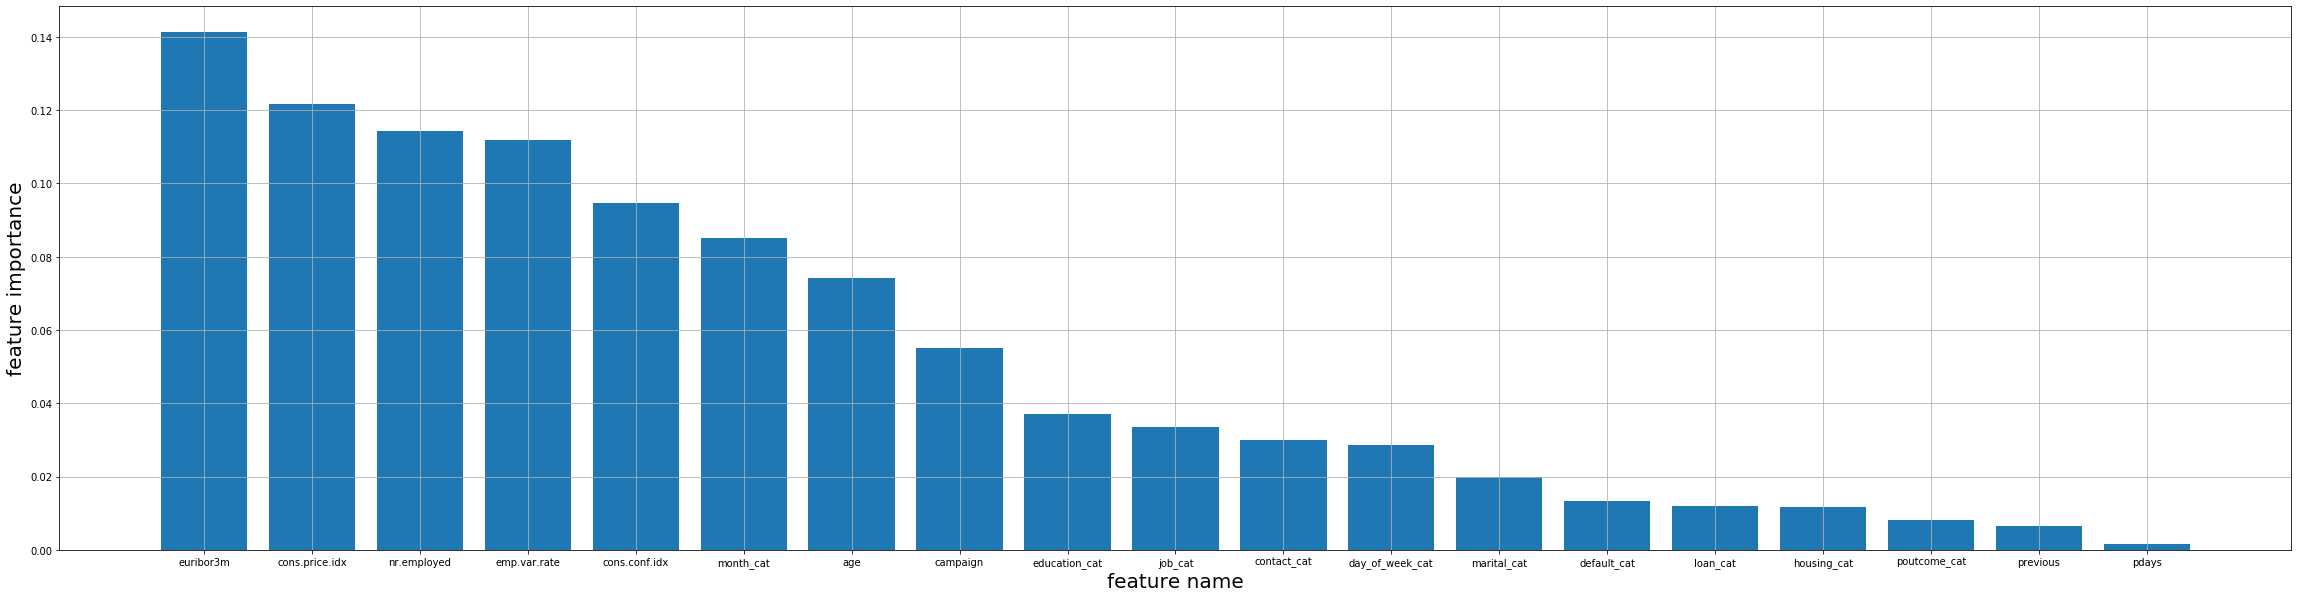

In [228]:
rfs_v2.show_features_importance(figsize=(40,10))